In [343]:
import numpy as np
import control.matlab as c
import time
import threading

I = 4
leverArm = 0.1  # cp-cg, center of pressure-center of gravity
CNa = 37 * np.pi / 180
# putting aerodynamic plant+control in a system of form xdot=Ax+Bu, where
# x represents the state
density = 1
v = 150;  # roughly half the speed of sound, this is the freestream air speed
A = 0.25 * np.pi * (6 * 25.4) ** 2
# C1=-CNa*leverArm*(0.5*density*v**2)/I;
C1 = 0.1
C2 = -0.001
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [C1, 0, C2, 0], [0, C1, 0, C2]]);
leverArmMotor = 0.1
Thrust = 97
I_stand = .716
C3 = Thrust * leverArmMotor / I_stand
B = [[0, 0], [0, 0], [C3, 0], [0, C3]]
Q = np.eye(4)
Q[(3, 3)] = 3
Q[(2, 2)] = 3
R = 4*np.eye(2)
K, S, E = c.lqr(A, B, Q, R)
#K=np.array([[0.7, 0,1.2, 0],[0, 0.7, 0, 0.8]])

#print(L)

print(K)

#print(np.matmul(K,L))

[[0.38541799 0.         0.58517896 0.        ]
 [0.         0.38541799 0.         0.38517896]]


[-0.70941086+0.j -7.21929292+0.j -1.31014782+0.j -3.90905875+0.j]


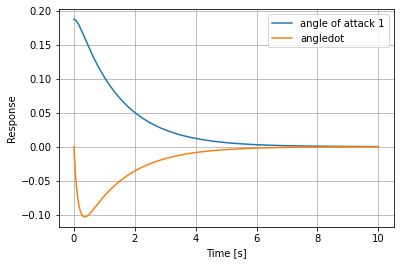

In [344]:
# Define the closed-loop system

sys_cl = c.ss(A - np.matmul(B,K), B, np.eye(4), np.zeros((4, 2)))
print(c.pole(sys_cl))
# Define the time vector
t = np.linspace(0, 10, 1000)

# Define the initial condition
x0 = [0.1875, 0, 0, 0]

# Compute the step response of the closed-loop system
x,t = c.initial(sys_cl, t, X0=x0)
# Plot the step response
plt.plot(t, x[:,0], label='angle of attack 1')
plt.plot(t,x[:,2],label='angledot')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()

[0.26179939 0.         0.         0.         0.         0.        ]


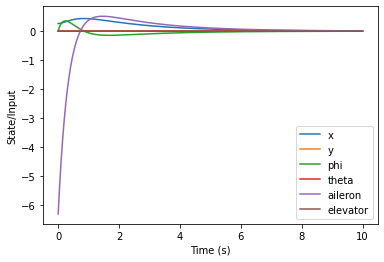

In [323]:
# define the simulation time span
t_span = np.arange(0, 10, 0.001)

# simulate the system using time-stepping
x = np.zeros((6, len(t_span)))
u = np.zeros((2, len(t_span)))
x[:,0] = np.array([np.pi/12, 0, 0, 0, 0, 0])
print(x[:,0])
for i in range(len(t_span) - 1):
    u[:,i] = -np.dot(K, x[:,i].reshape(6, 1)).flatten()
   
    x_dot = np.matmul(A,x[:,i])+np.matmul(B,u[:,i])
    x[:,i+1] = (x[:,i] + x_dot.flatten()*0.001).flatten()

# plot the results
plt.plot(t_span, x[0,:], label='x')
plt.plot(t_span, x[1,:], label='y')
plt.plot(t_span, x[2,:], label='phi')
plt.plot(t_span, x[3,:], label='theta')
plt.plot(t_span, u[0,:], label='aileron')
plt.plot(t_span, u[1,:], label='elevator')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('State/Input')
plt.show()



